In [479]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "twitter-pfizer-anticovid"

# **Import**

In [480]:
library(tidyverse)
library(dplyr)
library(ggplot2)
library(gridExtra)
library(psych)
library(ggcorrplot)

# **1. Data Import & EDA**

In [481]:
df <- read.csv('/kaggle/input/twitter-pfizer-anticovid/dataset_Vaccine_Pfizer.csv')

In [482]:
str(df)

'data.frame':	1129 obs. of  5 variables:
 $ id          : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Text        : chr  "Historically there have been barriers in the healthcare community to fair representation and equity in… " "Honored and PfizerProud to see the trust that the public has placed in us reflected in this survey. We never forge… " "COVID19 illuminated the need to improve equity in clinicaltrials.\n\nNext week, our Chief Development Officer… " "Today we published a landmark study on diversity in our clinicaltrials. We conducted this study to set a benchmar… " ...
 $ Subjectivity: num  0.45 0.0667 0 0 0.3 ...
 $ Polarity    : num  0.35 0 0 0 0.2 ...
 $ Target      : chr  "Positive" "Neutral" "Neutral" "Neutral" ...


In [483]:
describe(df)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
id,1,1129,564.2373782,326.3723513,564.000,564.1723757,418.0932000,0.0,1129,1129.0,0.001747760,-1.2027505,9.713290763
Text*,2,1129,555.1470328,319.8579300,557.000,555.1569061,409.1976000,1.0,1109,1108.0,-0.002328191,-1.1994906,9.519412611
Subjectivity,3,1128,0.3718804,0.3413827,0.375,0.3407992,0.5559750,0.0,1,1.0,0.381006330,-1.1082402,0.010164523
Polarity,4,1128,0.1607564,0.2517926,0.000,0.1292818,0.1374494,-0.5,1,1.5,1.037660929,0.7296594,0.007497017
Target*,5,1129,3.3994686,0.6446999,3.000,3.4828729,1.4826000,1.0,4,3.0,-0.624166909,-0.5129034,0.019187158


In [484]:
summary(df)

       id             Text            Subjectivity       Polarity      
 Min.   :   0.0   Length:1129        Min.   :0.0000   Min.   :-0.5000  
 1st Qu.: 282.0   Class :character   1st Qu.:0.0000   1st Qu.: 0.0000  
 Median : 564.0   Mode  :character   Median :0.3750   Median : 0.0000  
 Mean   : 564.2                      Mean   :0.3719   Mean   : 0.1608  
 3rd Qu.: 846.0                      3rd Qu.:0.6205   3rd Qu.: 0.3000  
 Max.   :1129.0                      Max.   :1.0000   Max.   : 1.0000  
                                     NA's   :1        NA's   :1        
    Target         
 Length:1129       
 Class :character  
 Mode  :character  
                   
                   
                   
                   

**Check missing value**

In [485]:
colSums(is.na(df))

id         Text Subjectivity     Polarity       Target 
           0            0            1            1            0

**Duplicate check**

In [486]:
sum(duplicated(df))

[1] 0

In [487]:
head(df)

,id,Text,Subjectivity,Polarity,Target
,<int>,<chr>,<dbl>,<dbl>,<chr>
1,0,Historically there have been barriers in the healthcare community to fair representation and equity in…,0.45000000,0.3500000,Positive
2,1,Honored and PfizerProud to see the trust that the public has placed in us reflected in this survey. We never forge…,0.06666667,0.0000000,Neutral
3,2,"COVID19 illuminated the need to improve equity in clinicaltrials. Next week, our Chief Development Officer…",0.00000000,0.0000000,Neutral
4,3,Today we published a landmark study on diversity in our clinicaltrials. We conducted this study to set a benchmar…,0.00000000,0.0000000,Neutral
5,4,"They volunteered🤚 to help change the world🌎 . We're sharing real kids thanking the real heroes, the 12-15 year old…",0.30000000,0.2000000,Positive
6,5,Bladder cancer is most common in patients over 65. Learn more about our commitment to addressing gaps in care for t…,0.50000000,0.2333333,Positive


In [488]:
tail(df)

,id,Text,Subjectivity,Polarity,Target
,<int>,<chr>,<dbl>,<dbl>,<chr>
1124,1124,"In honor of WorldArthritisDay, we’re highlighting how people who live with rheumatoidarthritis and…",0.5000000,0.1363636,Positive
1125,1125,People living with rheumatoidarthritis and psoriaticarthritis should feel comfortable talking openly with their d…,0.6500000,0.2000000,Positive
1126,1126,"When it comes to working with your doctor to manage your rheumatoidarthritis and psoriaticarthritis, are you alwa…",0.0000000,0.0000000,Neutral
1127,1127,Day of the Girl; a worldwide revolution to inspire girls to take bigger strides and reach the highest of ambitions.…,0.5000000,0.0000000,Neutral
1128,1128,Tomorrow is WorldArthritisDay! Read more about how Pfizer is working to break down barriers between patients and…,0.3944444,0.1722222,Positive
1129,1129,"Millions of people have atopiceczema, yet it’s still a misunderstood skin",NA,NA,


# **2. Data Transform**

In [489]:
df <- na.omit(df)

**Data Check**

In [490]:
colSums(is.na(df))

id         Text Subjectivity     Polarity       Target 
           0            0            0            0            0

# **3. Data Visualization**

In [491]:
num_cols <- {}

for(i in 2:length(df)){
    if(is.numeric(df[[i]]) == TRUE)
        num_cols <- c(num_cols ,colnames(df[i]))
}

In [492]:
num_cols

[1] "Subjectivity" "Polarity"

## **Histogram & Densityplot & Boxplot**

In [493]:
options(repr.plot.width = 20.0, repr.plot.height = 10.0)

Warning message in geom_histogram(aes(x = df[, i]), fill = "skyblue", col = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”
Warning message in geom_histogram(aes(x = df[, i]), fill = "skyblue", col = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


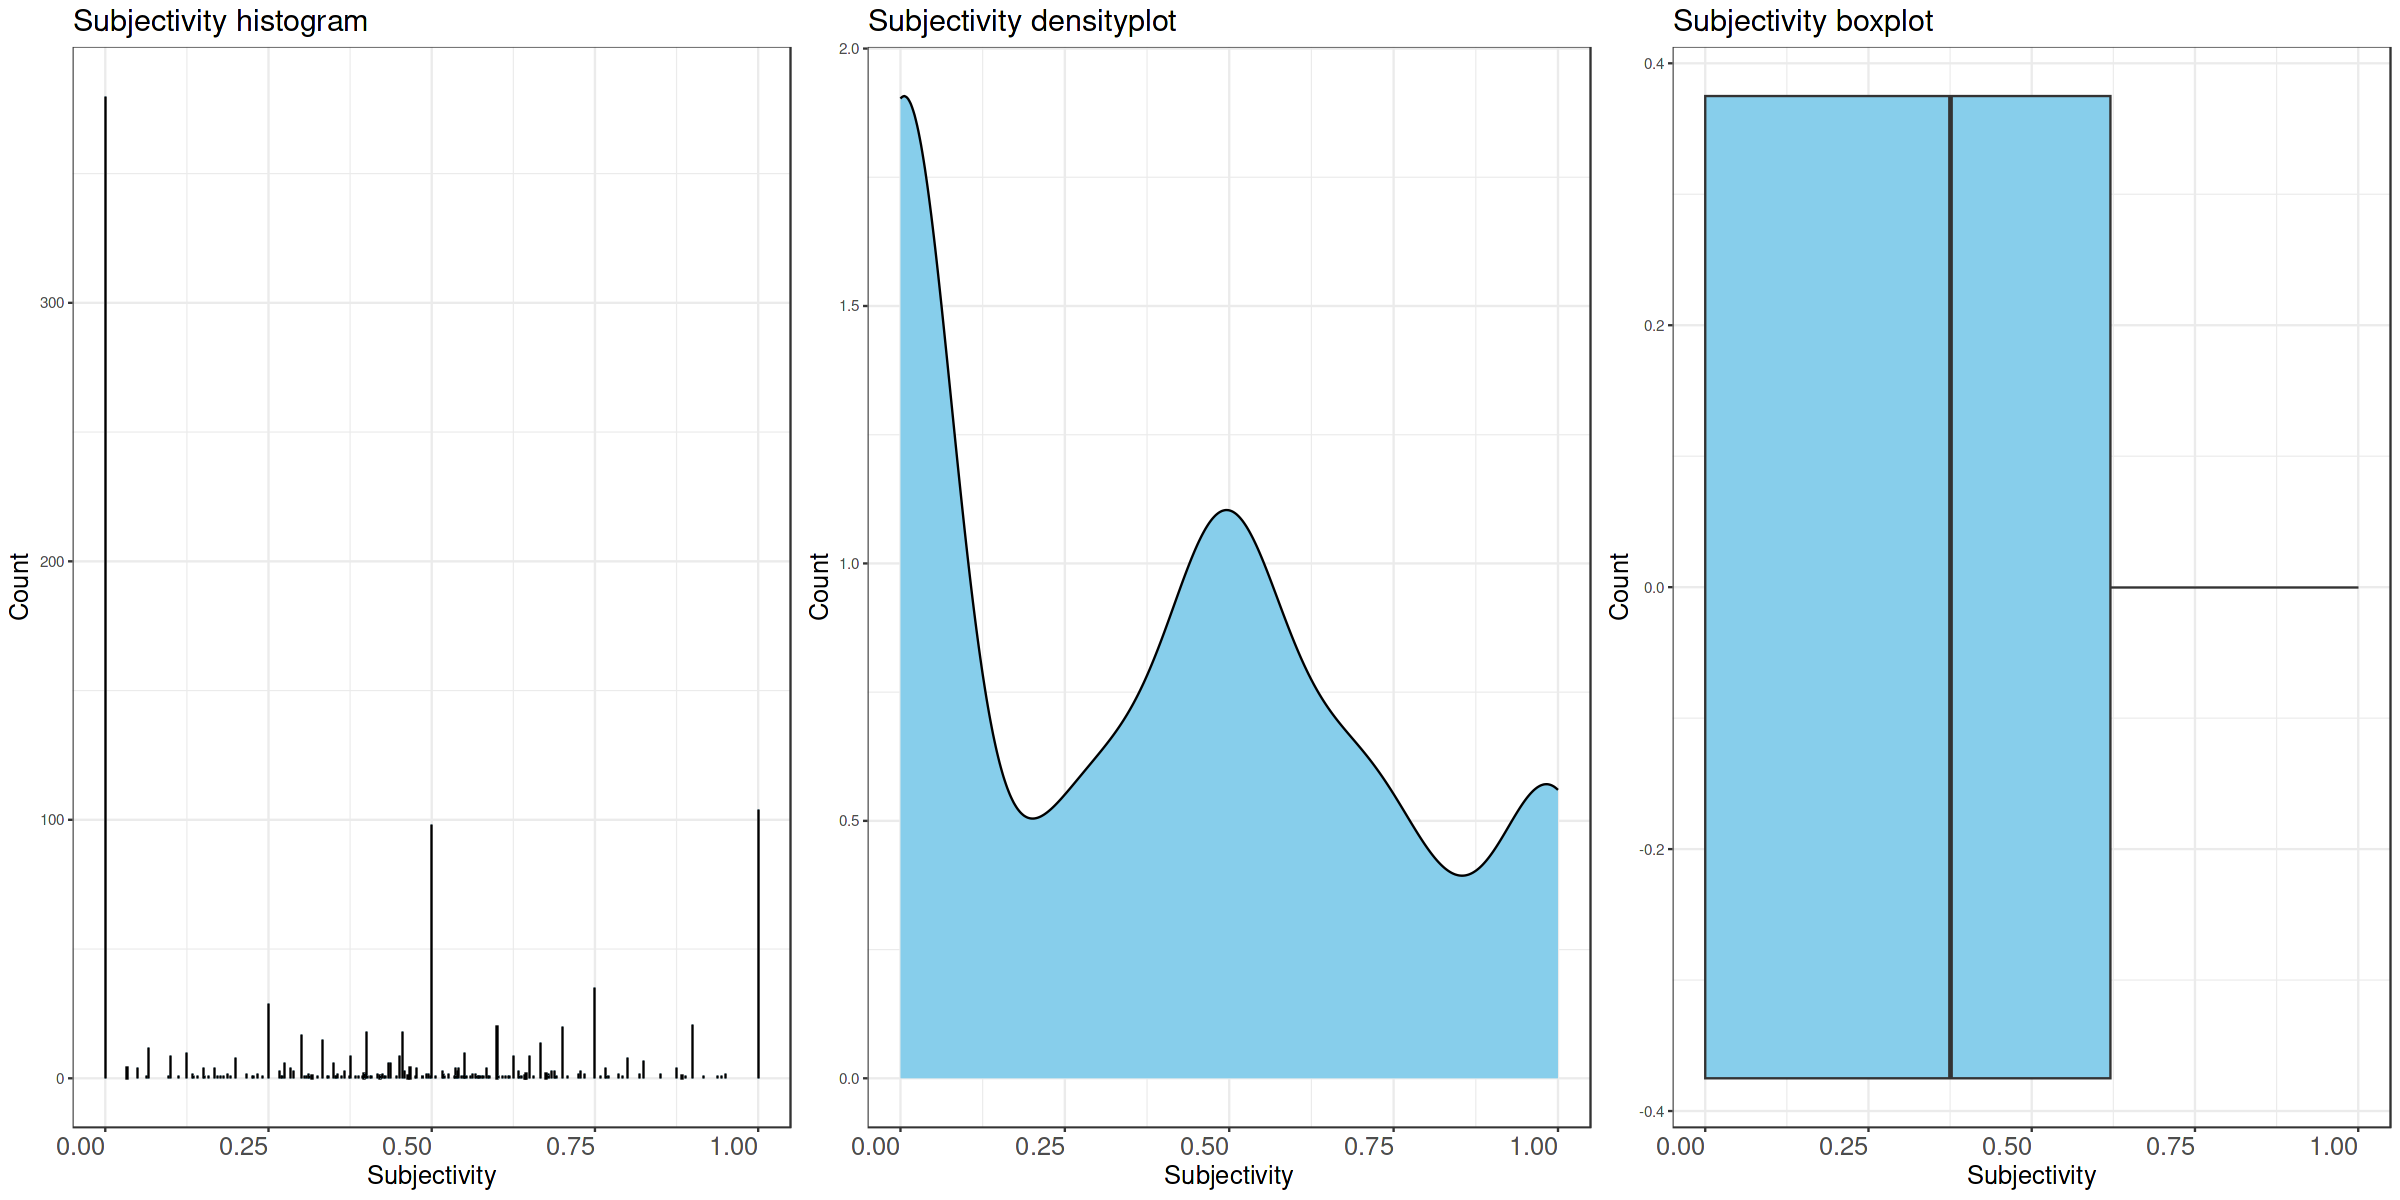

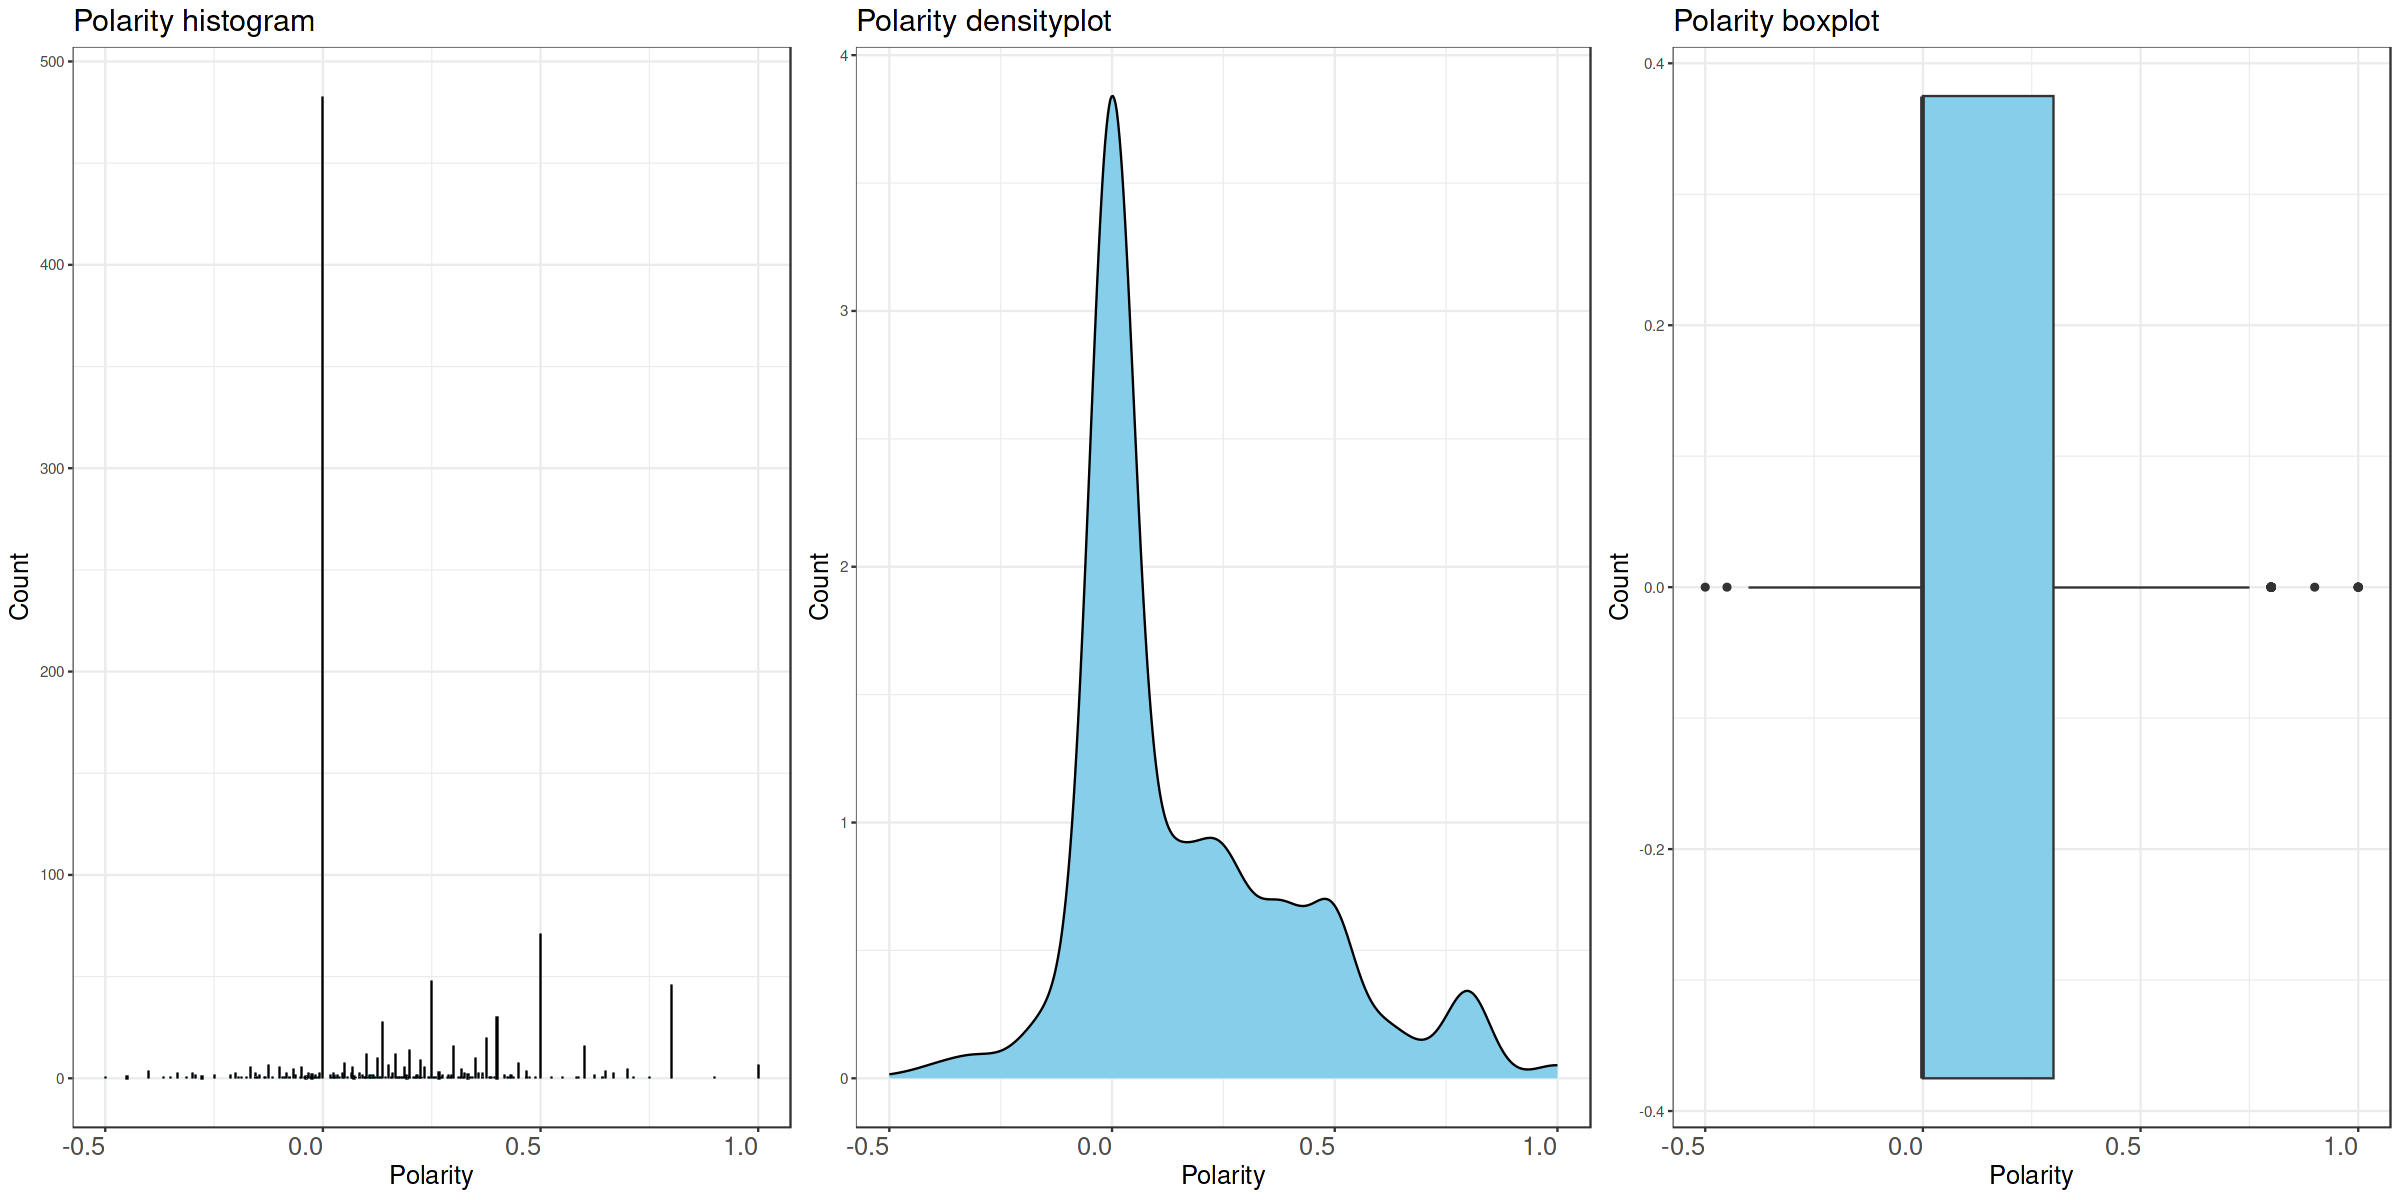

In [494]:
for(i in num_cols){
    a <- ggplot(df) + geom_histogram(aes(x= df[,i]), fill = 'skyblue', col = 'black', position = 'dodge', stat="count" ,bins = 30) + 
            labs(title = paste0(names(df[i]),' histogram'), x = names(df[i]), y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )
    
    b <- ggplot(df) + geom_density(aes(x= df[,i]), fill = 'skyblue') + 
            labs(title = paste0(names(df[i]),' densityplot'), x = names(df[i]), y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            ) 
    
    c <- ggplot(df) + geom_boxplot(aes(x= df[,i]), fill = 'skyblue') + 
            labs(title = paste0(names(df[i]),' boxplot'), x = names(df[i]), y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )    
    
    grid.arrange(a,b, c, ncol = 3)    
}

## **CountPlot**

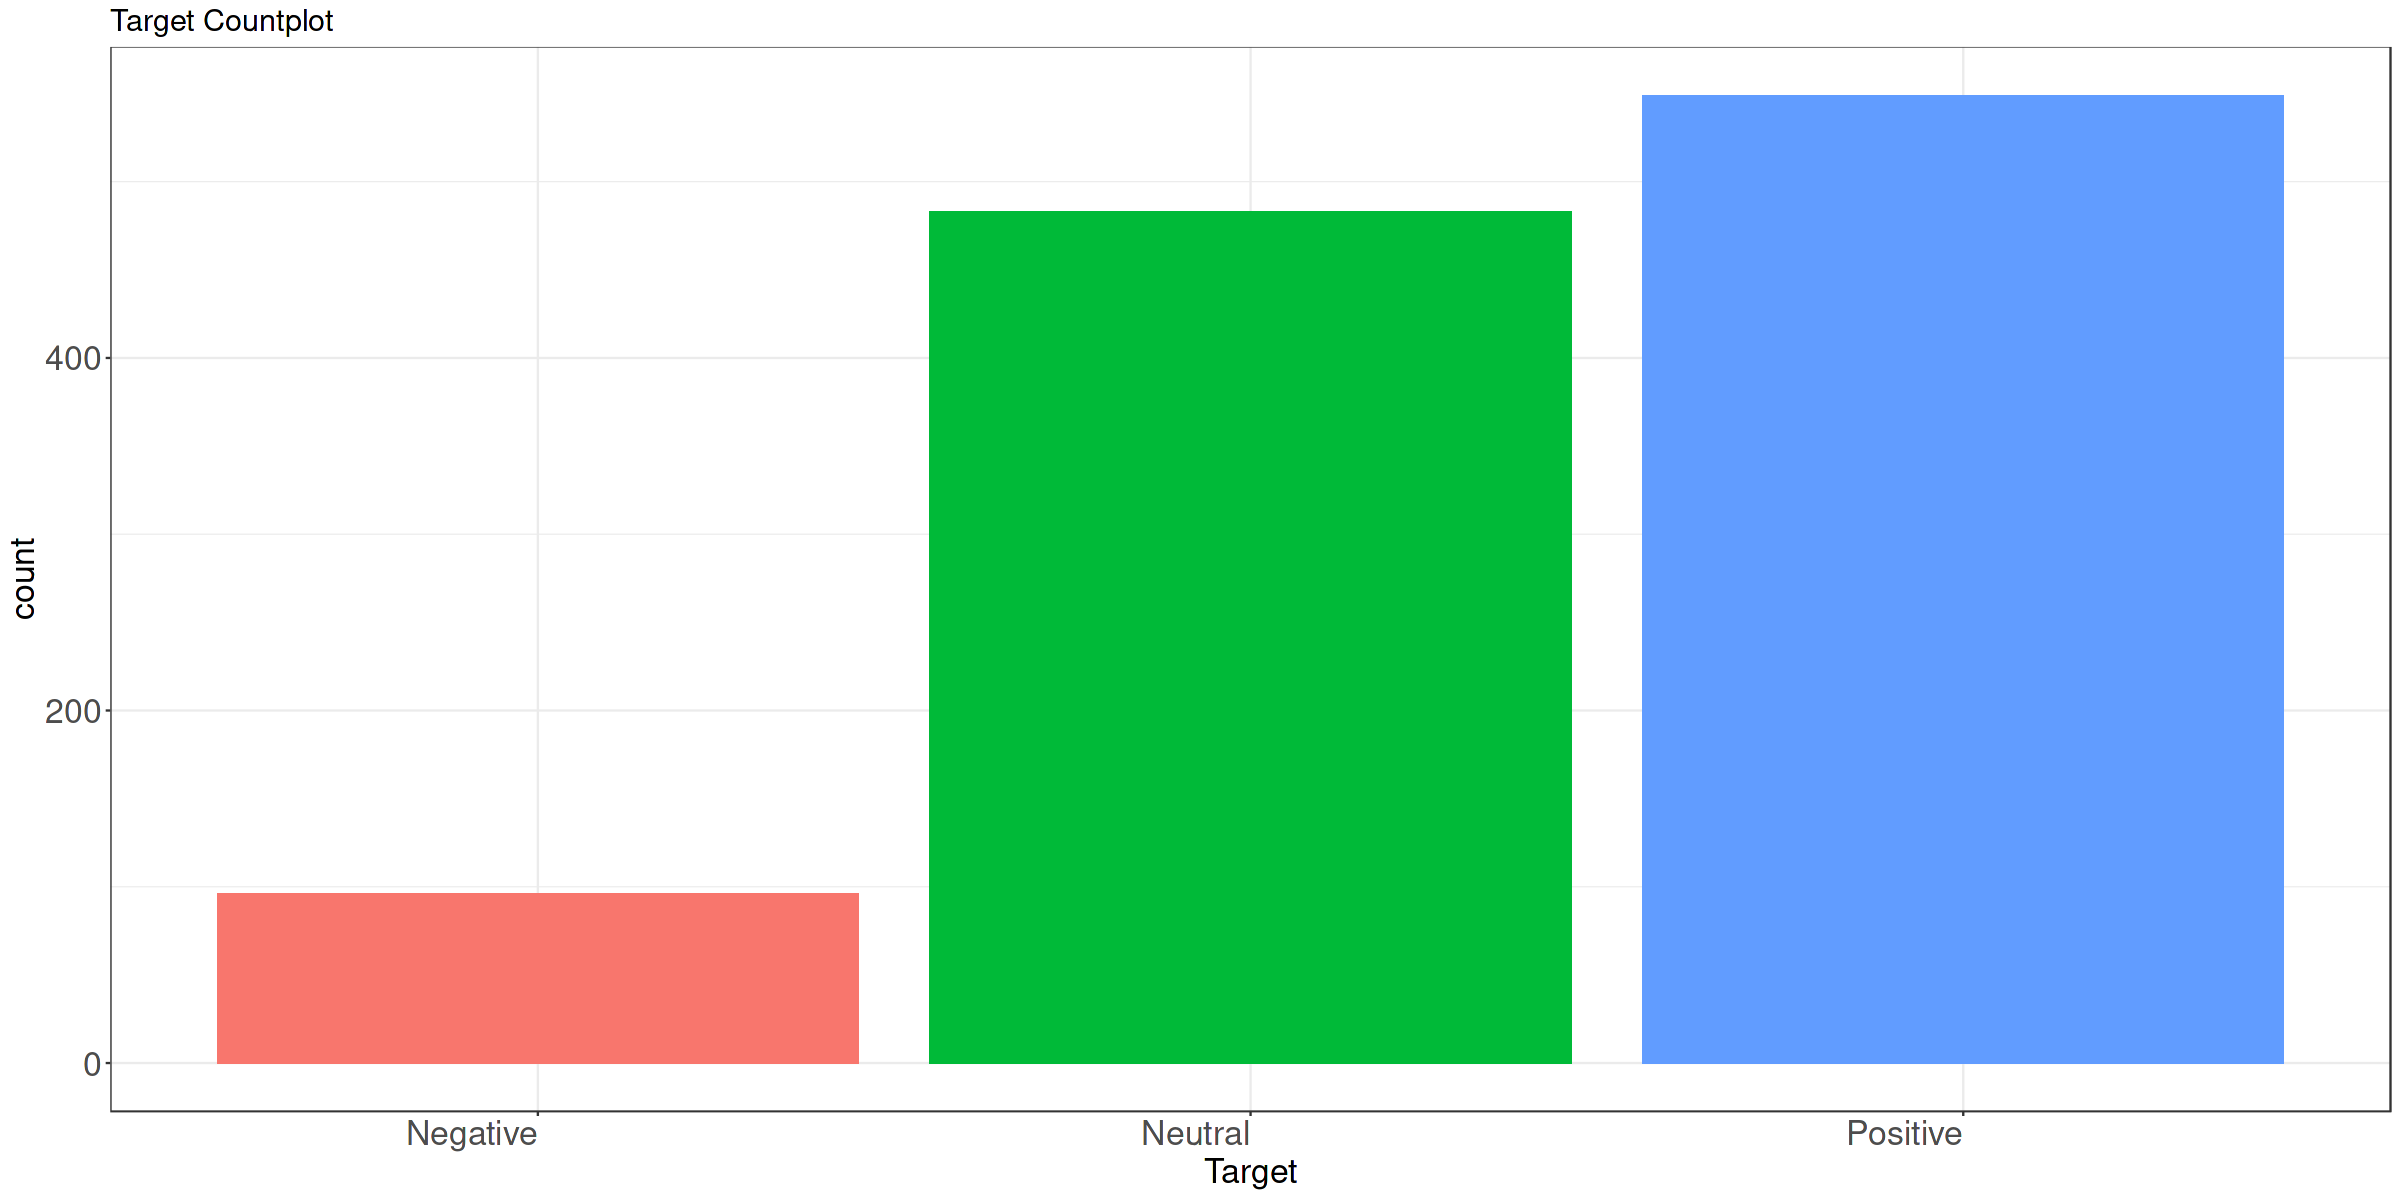

In [495]:
ggplot(df) + geom_bar(aes(x= Target , fill = Target), position = 'dodge') +
    theme_bw() +
    ggtitle('Target Countplot') + 
    theme(
    legend.position = 'none',
    axis.title = element_text(size=20),
    axis.text.x = element_text(size = 20, hjust=1),
    axis.text.y = element_text(size = 20),
    title = element_text(size=15)
    )

# **4. Modeling**

In [496]:
library(tm)
library(twitteR)
library(SnowballC)
library(wordcloud)

In [497]:
text_df <- df %>% select(Text,Target)
head(text_df)

,Text,Target
,<chr>,<chr>
1,Historically there have been barriers in the healthcare community to fair representation and equity in…,Positive
2,Honored and PfizerProud to see the trust that the public has placed in us reflected in this survey. We never forge…,Neutral
3,"COVID19 illuminated the need to improve equity in clinicaltrials. Next week, our Chief Development Officer…",Neutral
4,Today we published a landmark study on diversity in our clinicaltrials. We conducted this study to set a benchmar…,Neutral
5,"They volunteered🤚 to help change the world🌎 . We're sharing real kids thanking the real heroes, the 12-15 year old…",Positive
6,Bladder cancer is most common in patients over 65. Learn more about our commitment to addressing gaps in care for t…,Positive


## **Data Preprocessing**

In [498]:
corpus <- VCorpus(VectorSource(text_df$Text))
as.character(corpus[[1]])

[1] "Historically there have been barriers in the healthcare community to fair representation and equity in… "

In [499]:
corpus

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 1128

In [500]:
corpus <- tm_map(corpus, content_transformer(tolower))
corpus <- tm_map(corpus, removeNumbers)
corpus <- tm_map(corpus, removePunctuation)
corpus <- tm_map(corpus, removeWords, stopwords('english'))
corpus <- tm_map(corpus, stemDocument)
corpus <- tm_map(corpus, stripWhitespace)
as.character(corpus[[1]])

[1] "histor barrier healthcar communiti fair represent equiti …"

## **Word Cloud**

In [501]:
dtm <- DocumentTermMatrix(corpus)
dtm
dim(dtm)

<<DocumentTermMatrix (documents: 1128, terms: 2923)>>
Non-/sparse entries: 11072/3286072
Sparsity           : 100%
Maximal term length: 47
Weighting          : term frequency (tf)

[1] 1128 2923

**The document-term matrix presently has 2908 words extracted from 1128 tweets. These words are what we will use to decide if a tweet is positive or negative or neutral**

**The sparcity of the dtm is 100% which means no words is left out the matrix.**

**Creating the Document Term Matrix for the model.**

**A document-term matrix is a mathematical matrix that describes the frequency of terms that occur in a collection of documents.**

In [502]:
dtm <- removeSparseTerms(dtm, 0.999)
dim(dtm)

[1] 1128 1265

In [503]:
freq <- sort(colSums(as.matrix(dtm)), decreasing=TRUE)

In [504]:
#More than 60times word
findFreqTerms(dtm, lowfreq=60)

[1] "’re"     "amp"     "can"     "covid"   "develop" "health"  "help"   
 [8] "learn"   "live"    "patient" "peopl"   "pfizer"  "proud"   "share"  
[15] "support" "today"   "vaccin"  "work"

In [505]:
wc <- data.frame(word=names(freq), freq=freq)
head(wc)

,word,freq
,<chr>,<dbl>
covid,covid,167
vaccin,vaccin,131
’re,’re,117
amp,amp,116
pfizer,pfizer,111
learn,learn,104


,Text,Target
,<chr>,<chr>
1,Historically there have been barriers in the healthcare community to fair representation and equity in…,Positive
5,"They volunteered🤚 to help change the world🌎 . We're sharing real kids thanking the real heroes, the 12-15 year old…",Positive
6,Bladder cancer is most common in patients over 65. Learn more about our commitment to addressing gaps in care for t…,Positive
9,"At Pfizer, we believe partnership is key to advancing exciting areas of breaking science. With the help of leading…",Positive
16,What progress looks like: &gt;1 million less cancer deaths thanks to the availability of new cancer drugs. We need po…,Positive
23,"Certain minority populations are 4x more likely to be diagnosed with metastatic melanoma, a more advanced stage of…",Positive


Warning message in tm_map.SimpleCorpus(corpus, tm::removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, function(x) tm::removeWords(x, tm::stopwords())):
“transformation drops documents”


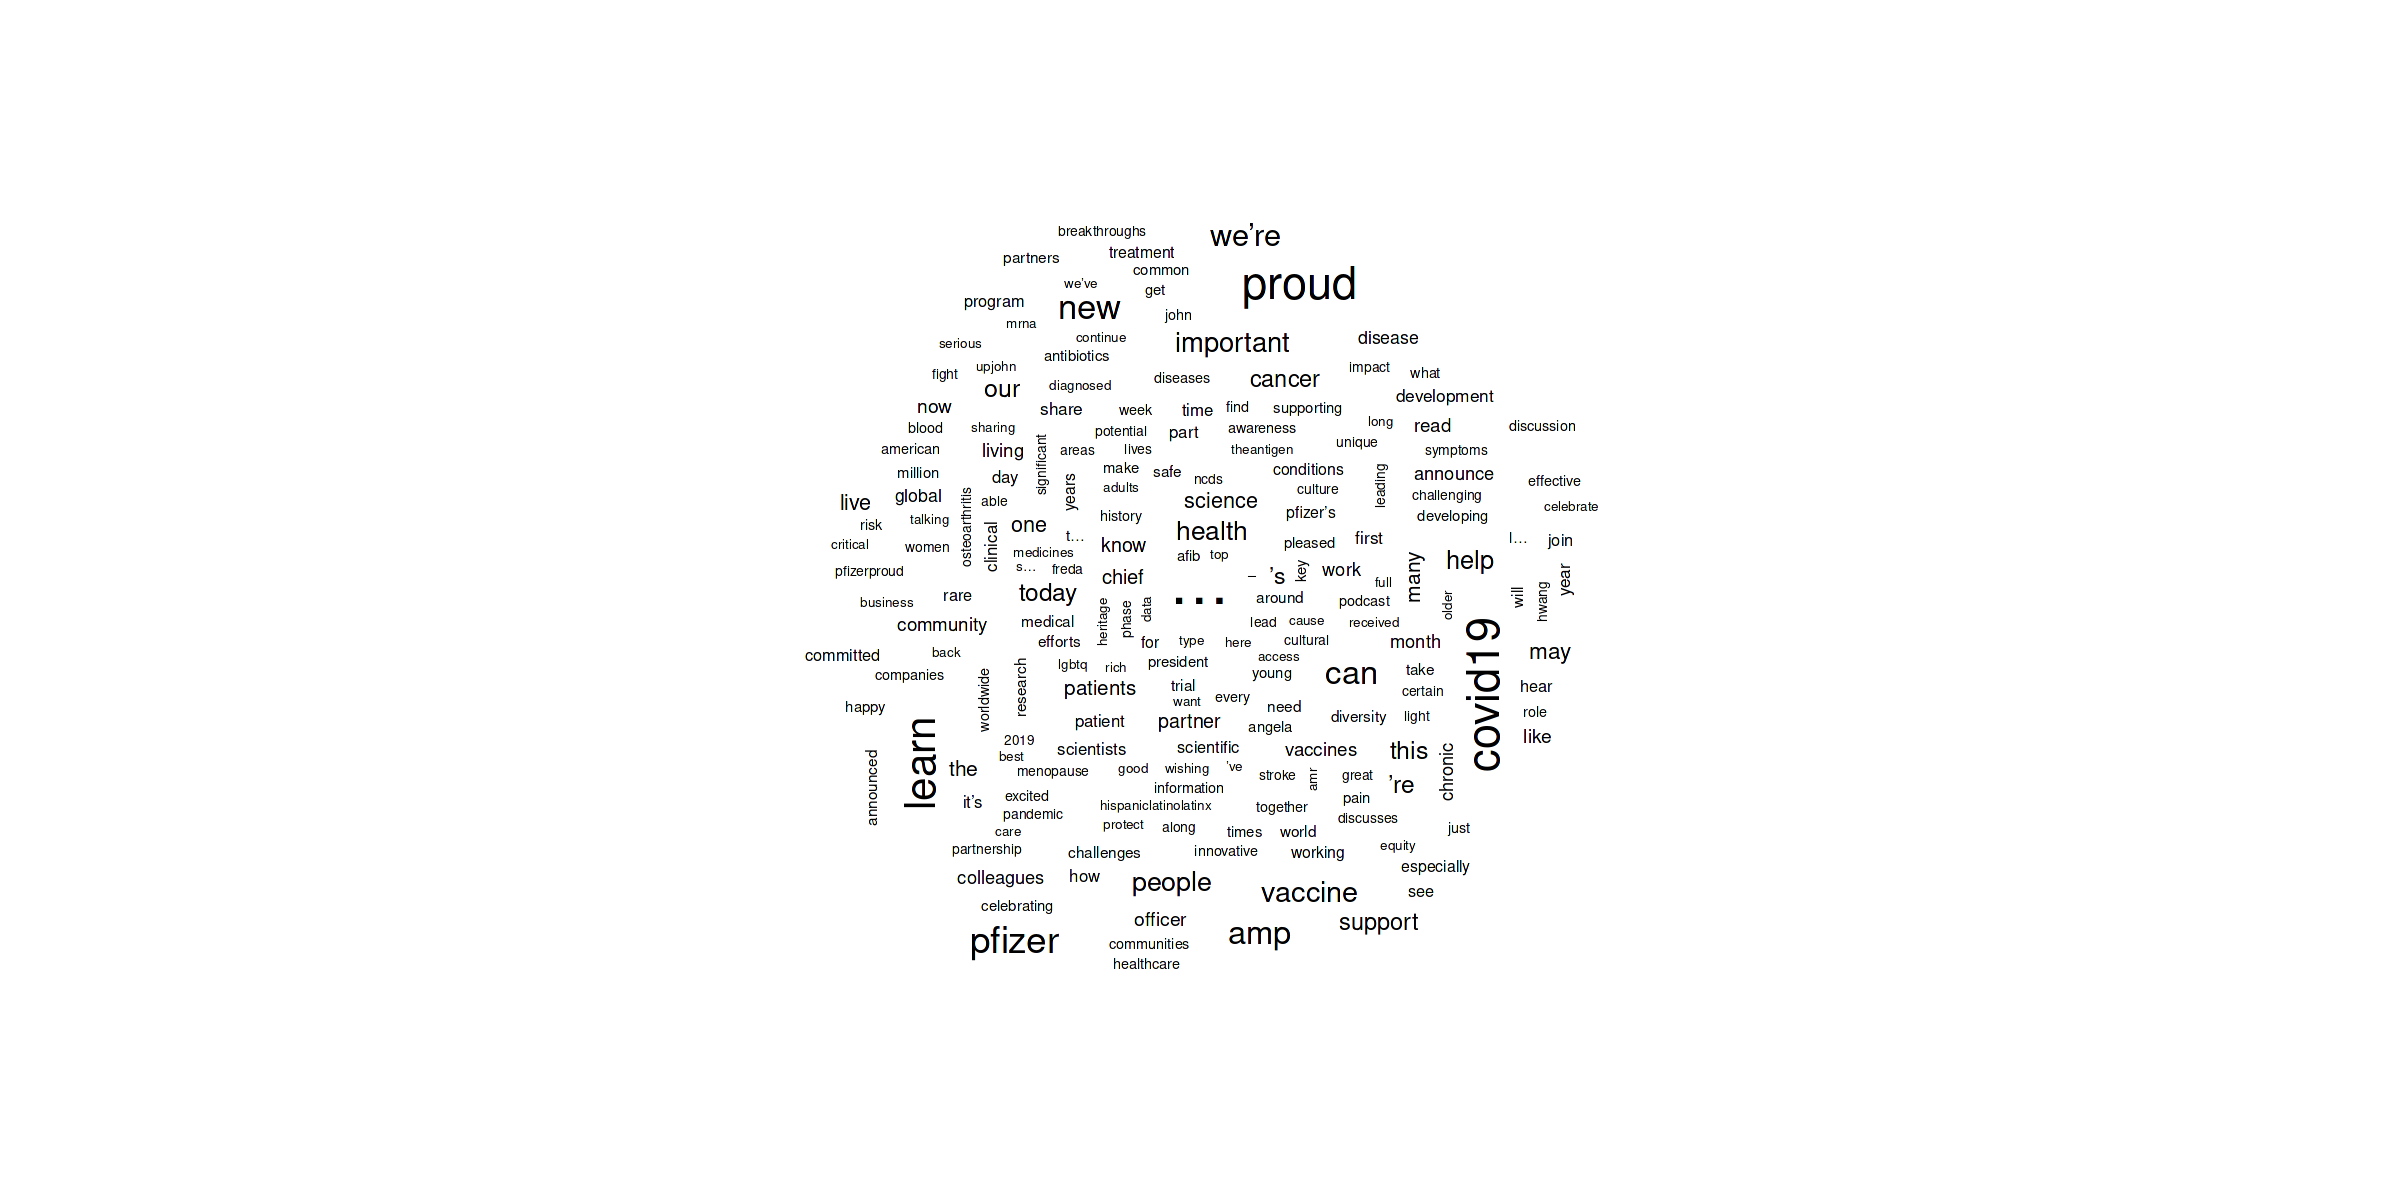

In [506]:
positive <- subset(text_df, Target == 'Positive')

head(positive)

wordcloud(positive$Text, max.words = 200, scale = c(3,0.5))

,Text,Target
,<chr>,<chr>
7,"Since 1971 has supported the mental health of Black nurses. Supported by The Pfizer Foundation, NBNA is a…",Negative
27,Tick-borne encephalitis (TBE) is a potentially serious but preventable disease transmitted by infected ticks foun…,Negative
68,"In this episode of Behind the Sc(i)en(c)e, discover the science behind developing an oral small molecule to potenti…",Negative
75,"In this episode of Behind the Sc(i)en(c)e, one of our scientists explains how we’re developing an investigational a…",Negative
104,"Cases of kidneycancer are increasing among all racial groups in the US, with the largest increase seen in Black Am…",Negative
105,Thursday marks the 1️⃣ year anniversary of declaring COVID19 a global pandemic. Follow the past year's journ…,Negative


Warning message in tm_map.SimpleCorpus(corpus, tm::removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, function(x) tm::removeWords(x, tm::stopwords())):
“transformation drops documents”


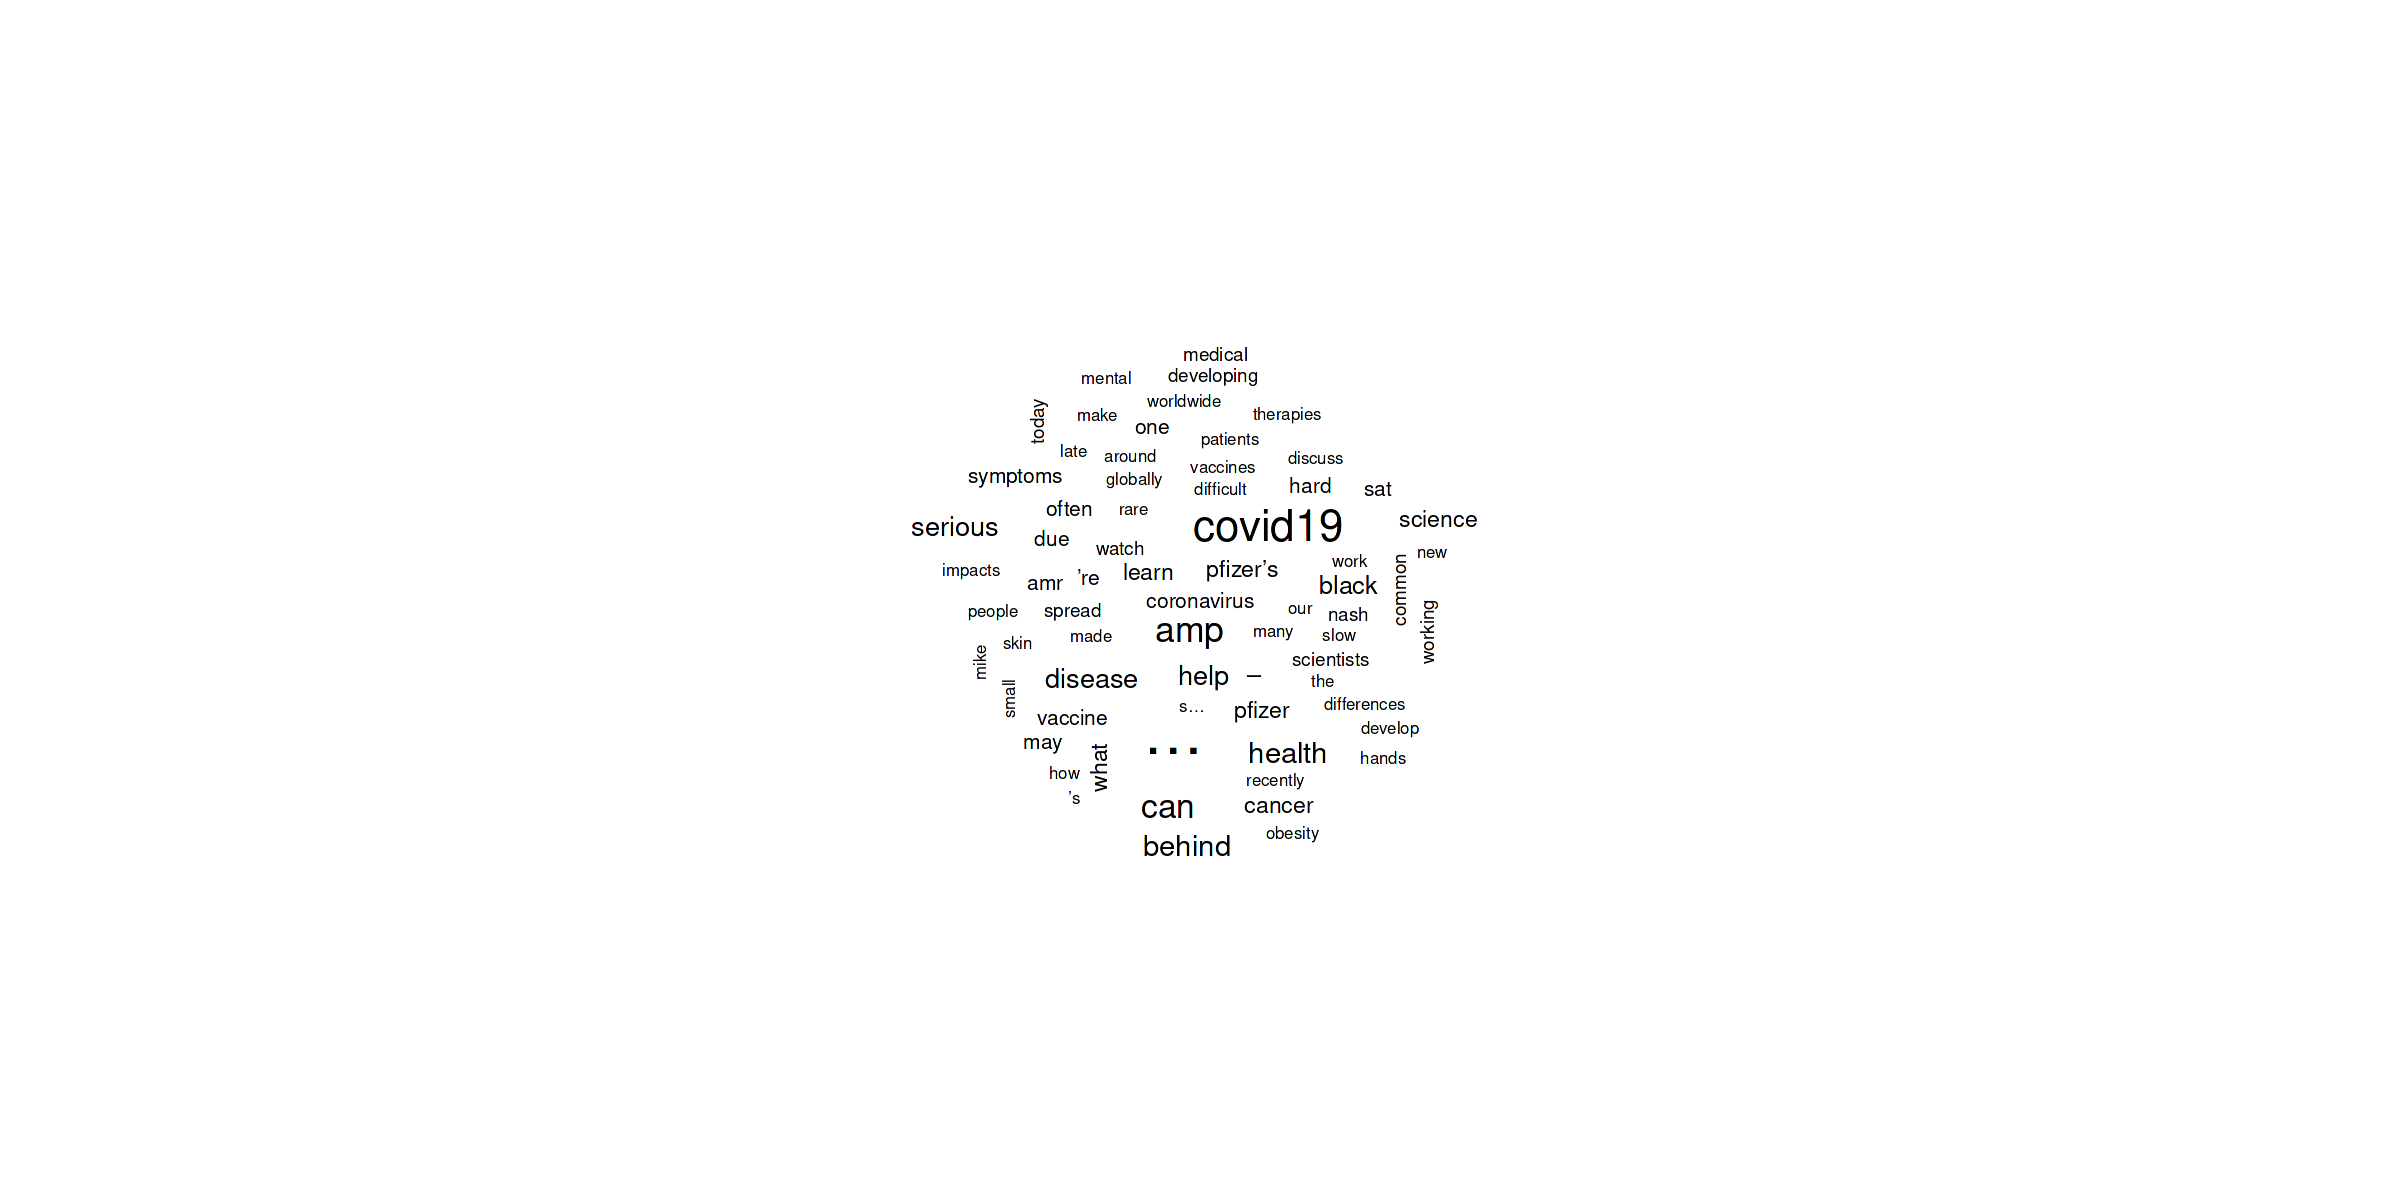

In [507]:
negative <- subset(text_df, Target == 'Negative')

head(negative)

wordcloud(negative$Text, max.words = 200, scale = c(3,0.5))

,Text,Target
,<chr>,<chr>
2,Honored and PfizerProud to see the trust that the public has placed in us reflected in this survey. We never forge…,Neutral
3,"COVID19 illuminated the need to improve equity in clinicaltrials. Next week, our Chief Development Officer…",Neutral
4,Today we published a landmark study on diversity in our clinicaltrials. We conducted this study to set a benchmar…,Neutral
8,We are resolute in support of the TimeToActCancer initiative. Come together and join 20 countries…,Neutral
10,"Our novel prediction model, derived from machinelearning, showed 87% accuracy in predicting wild-type ATTRCM in a…",Neutral
11,"🗣️On EuropeanStrokeAwarenessDay today, in partnership with European Stroke Organisation , we are launching the…",Neutral


Warning message in tm_map.SimpleCorpus(corpus, tm::removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, function(x) tm::removeWords(x, tm::stopwords())):
“transformation drops documents”


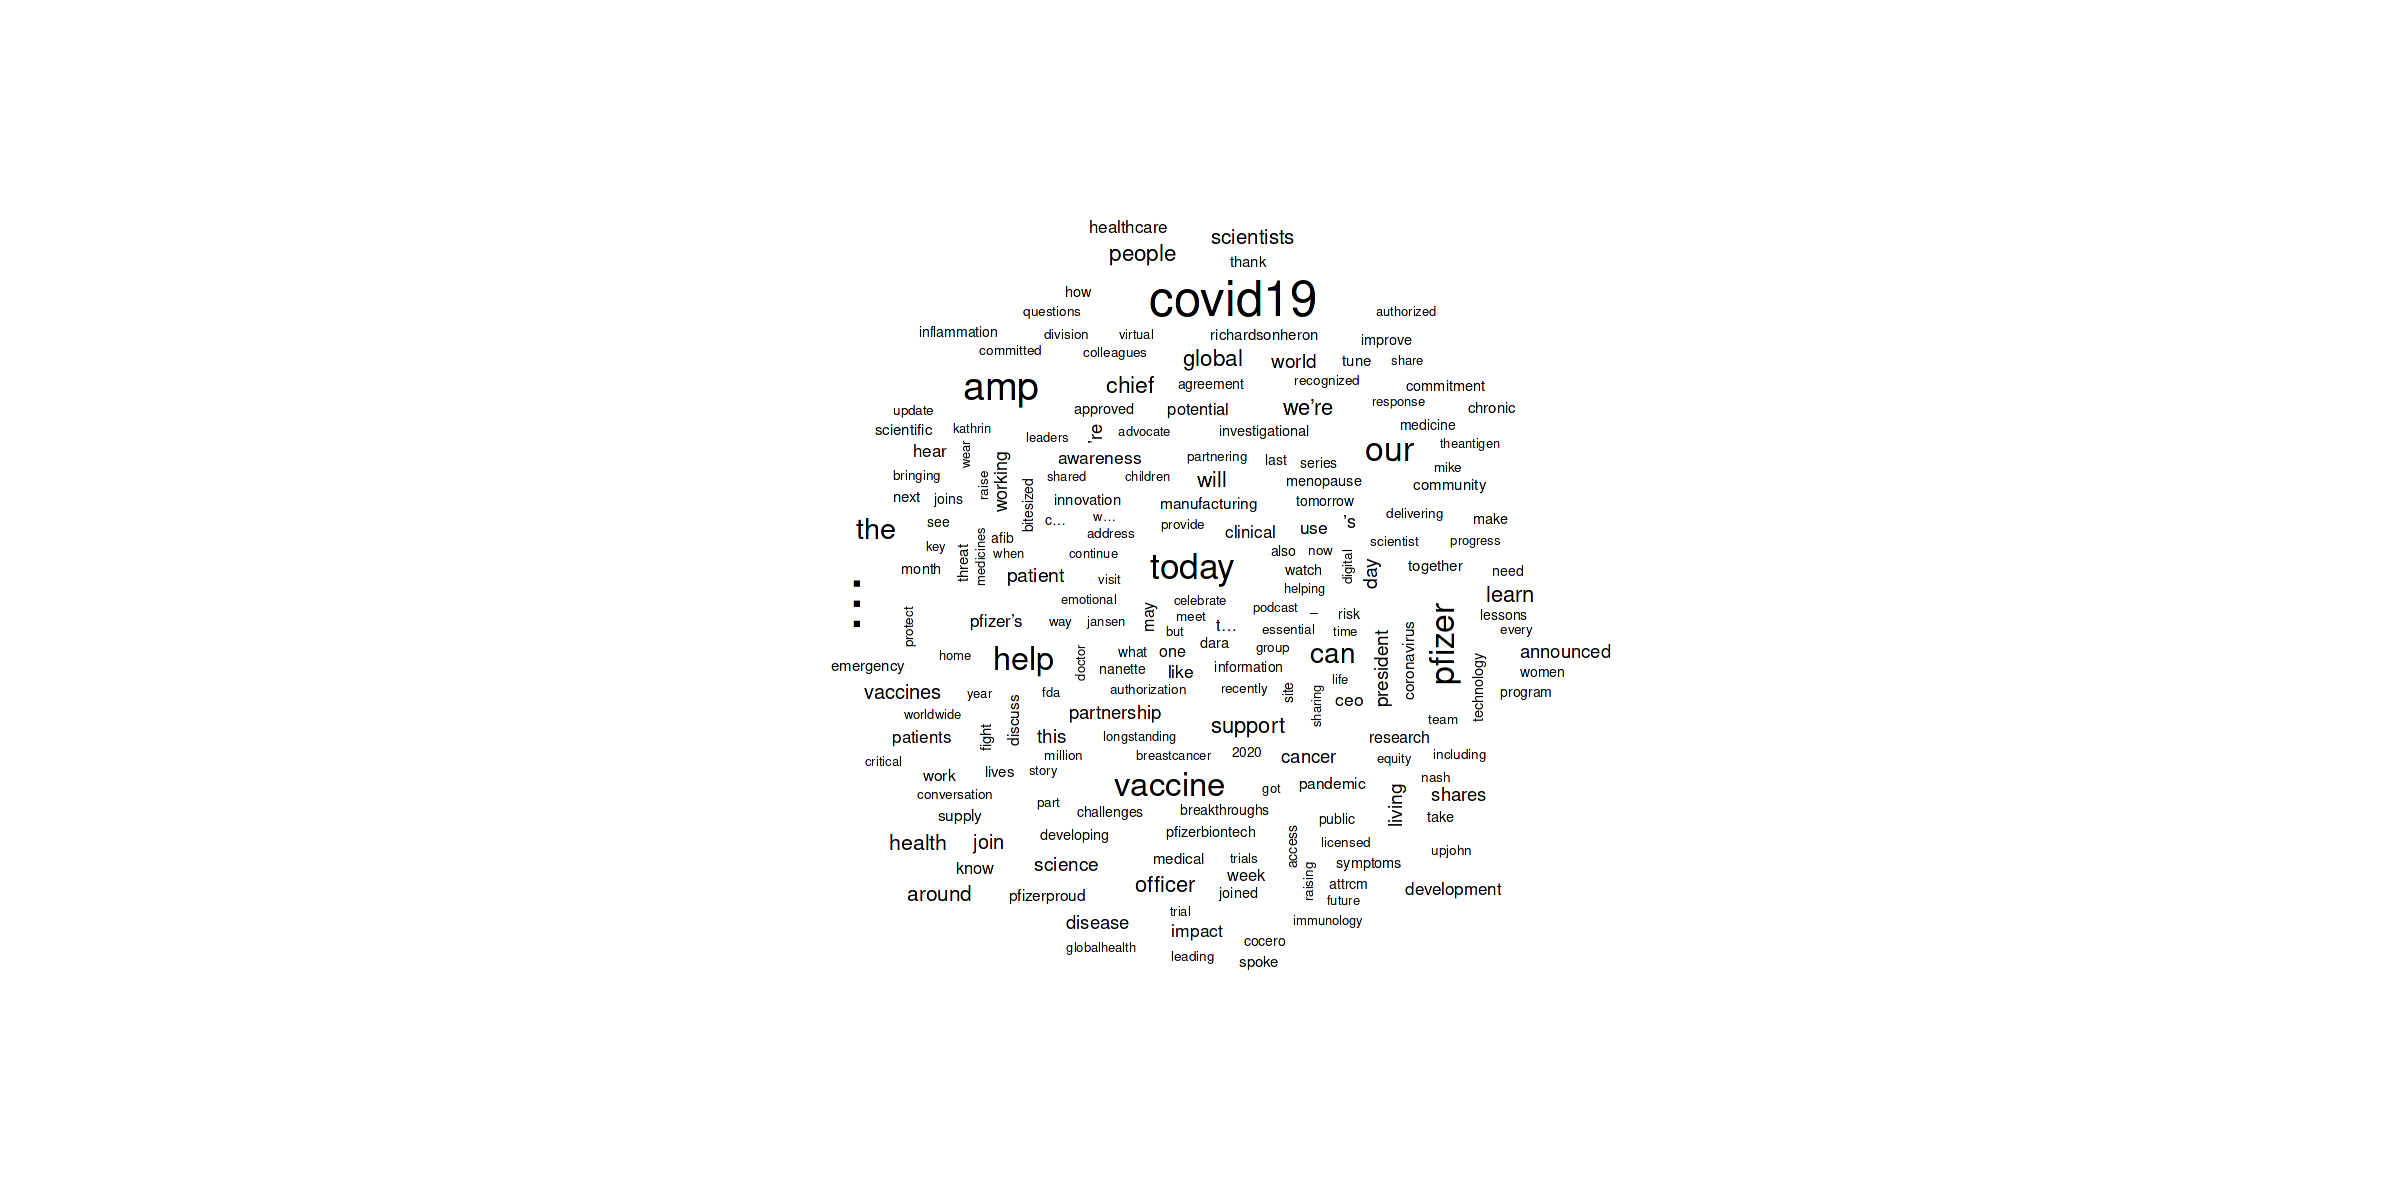

In [508]:
neutral <- subset(text_df, Target == 'Neutral')

head(neutral)

wordcloud(neutral$Text, max.words = 200, scale = c(3,0.5))

## **Data Split**

In [509]:
set.seed(123)

split = sample(2, nrow(df),prob = c(0.75,0.25),replace = TRUE)
train_set = df[split == 1,]
test_set = df[split == 2,] 

cat('Train Data')
table(train_set$Target)
cat('\nTrain Data prop')
prop.table(table(train_set$Target))

cat('---------------------------------')

cat('\nTest Data')
table(test_set$Target)

cat('\nTest Data prop')
prop.table(table(test_set$Target))

Train Data


Negative  Neutral Positive 
      75      353      424 


Train Data prop


  Negative    Neutral   Positive 
0.08802817 0.41431925 0.49765258 

---------------------------------
Test Data


Negative  Neutral Positive 
      21      130      125 


Test Data prop


  Negative    Neutral   Positive 
0.07608696 0.47101449 0.45289855 

In [510]:
train_set$Target <- as.factor(train_set$Target)
test_set$Target <- as.factor(test_set$Target)

## **Modeling**

In [511]:
library(randomForest)
library(rpart)
library(tree)
library(caret)

## **RandomForest Model**

In [512]:
rf_model <- randomForest(Target ~. ,ntree = 300 , data = train_set)

rf_model


Call:
 randomForest(formula = Target ~ ., data = train_set, ntree = 300) 
               Type of random forest: classification
                     Number of trees: 300
No. of variables tried at each split: 2

        OOB estimate of  error rate: 0%
Confusion matrix:
         Negative Neutral Positive class.error
Negative       75       0        0           0
Neutral         0     353        0           0
Positive        0       0      424           0

In [513]:
pred <- predict(rf_model, test_set)

In [514]:
cm <- confusionMatrix(pred, test_set$Target)

In [515]:
cm

Confusion Matrix and Statistics

          Reference
Prediction Negative Neutral Positive
  Negative       21       0        0
  Neutral         0     130        0
  Positive        0       0      125

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.9867, 1)
    No Information Rate : 0.471      
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: Negative Class: Neutral Class: Positive
Sensitivity                  1.00000          1.000          1.0000
Specificity                  1.00000          1.000          1.0000
Pos Pred Value               1.00000          1.000          1.0000
Neg Pred Value               1.00000          1.000          1.0000
Prevalence                   0.07609          0.471          0.4529
Detect

In [516]:
rf_cm <- data.frame(cm$table)

In [517]:
rf_cm

Prediction,Reference,Freq
<fct>,<fct>,<int>
Negative,Negative,21
Neutral,Negative,0
Positive,Negative,0
Negative,Neutral,0
Neutral,Neutral,130
Positive,Neutral,0
Negative,Positive,0
Neutral,Positive,0
Positive,Positive,125


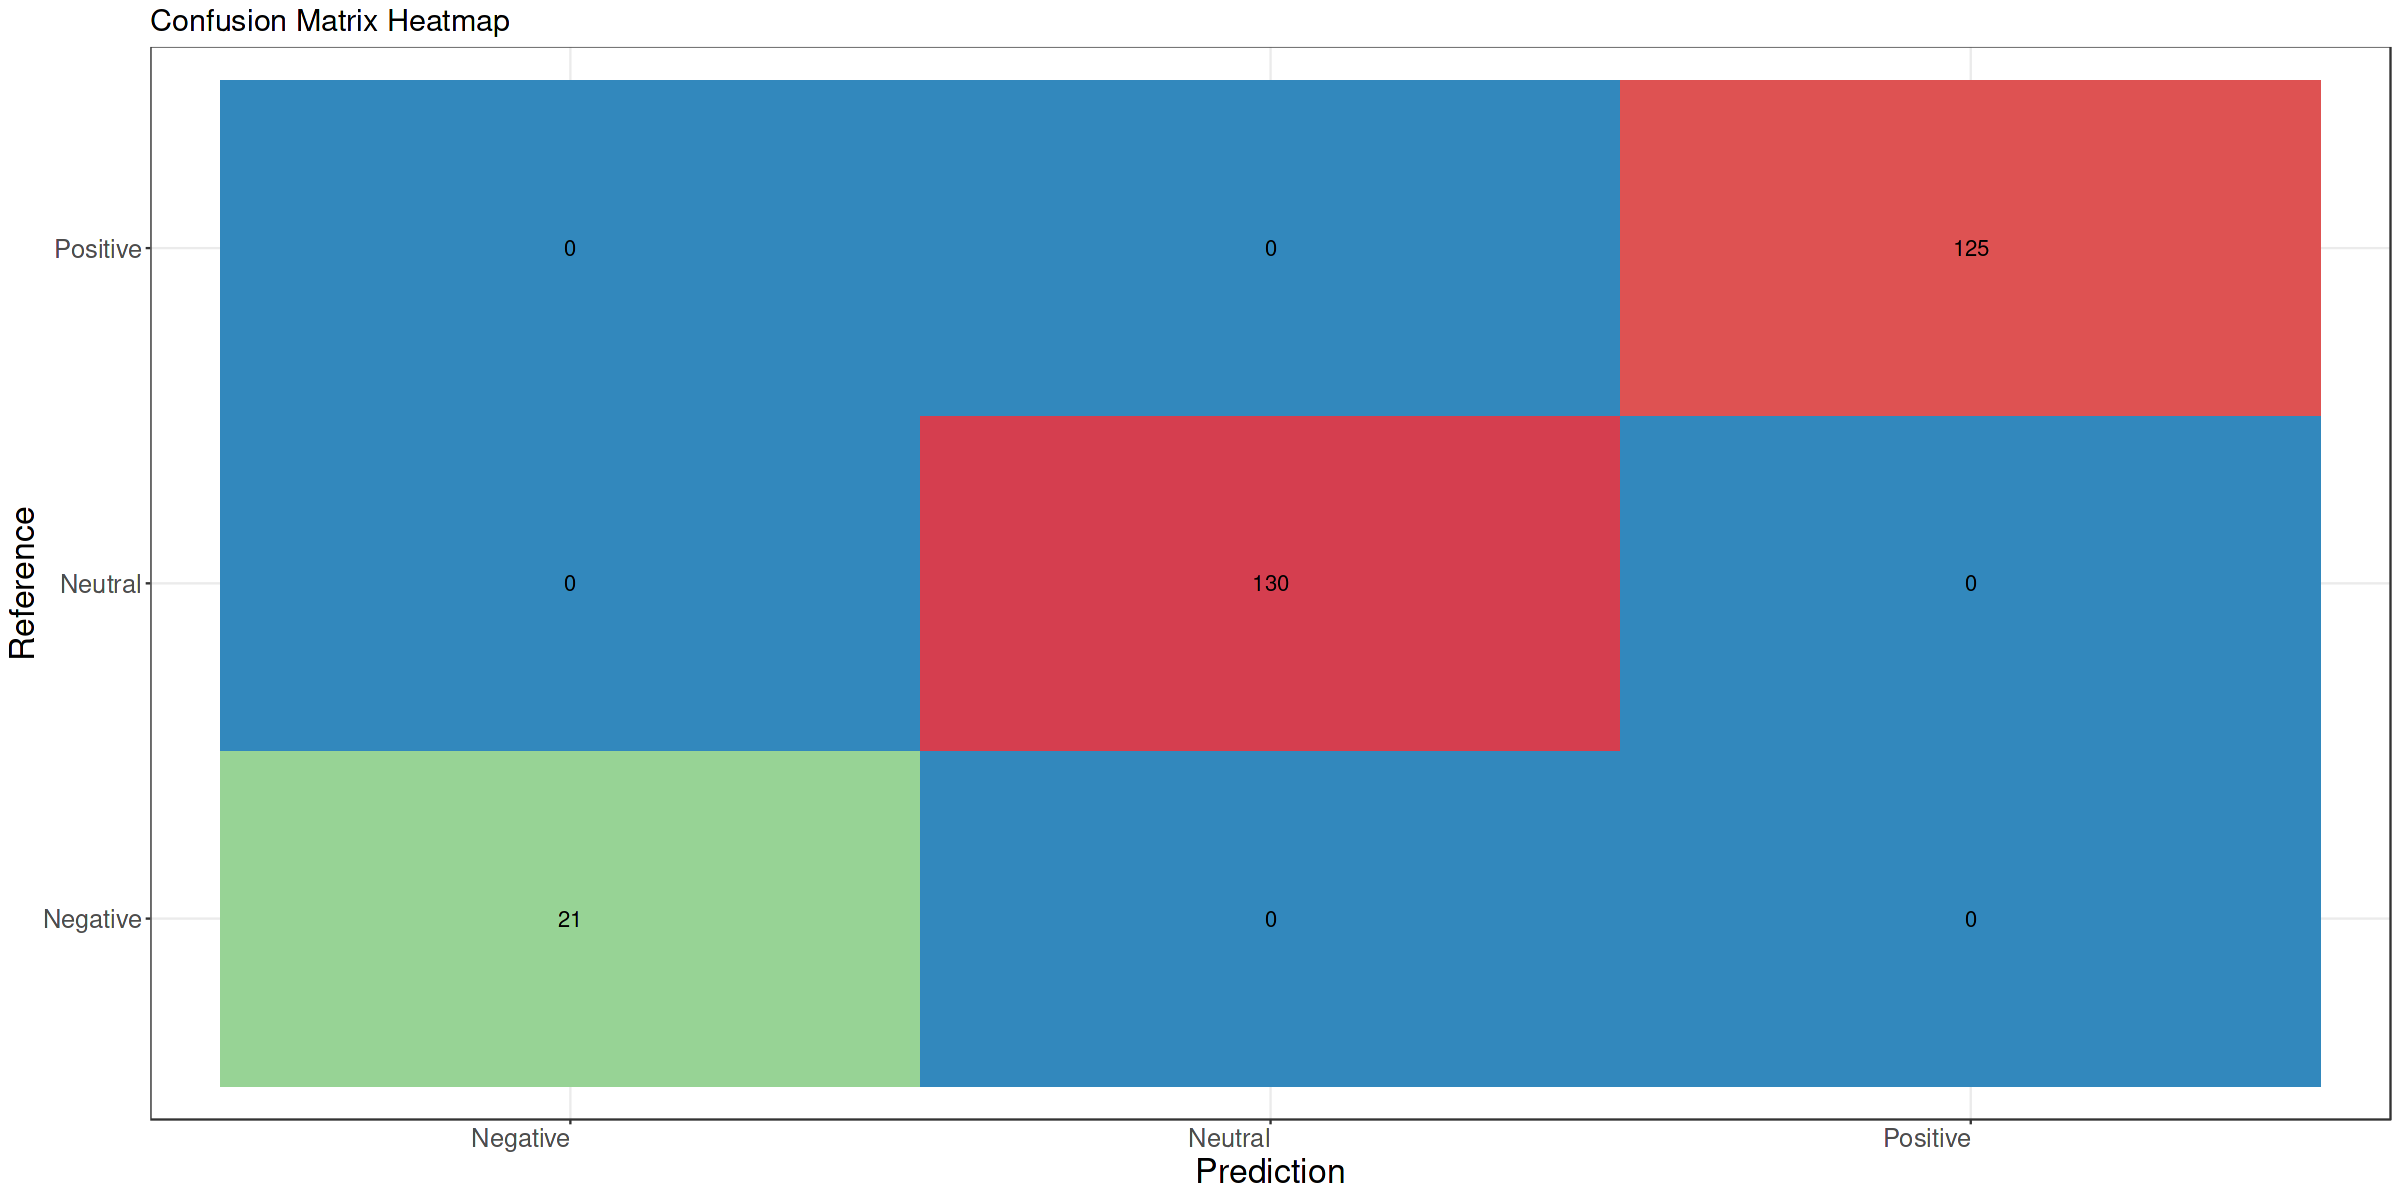

In [518]:
ggplot(rf_cm) + geom_tile(aes(x= Prediction, y= Reference, fill = Freq)) +
                geom_text(aes(x= Prediction, y= Reference , label = Freq, size = 40), alpha = 5,) +
                scale_fill_distiller(palette = 'Spectral')+
                ggtitle('Confusion Matrix Heatmap') +
                theme_bw() +
                theme(
                legend.position = 'none',
                axis.title = element_text(size=20),
                axis.text.x = element_text(size = 15, hjust=1),
                axis.text.y = element_text(size = 15, hjust=1),
                title = element_text(size=15)
                )

**Thankyou. Please leave your advice in the comments**